<a href="https://colab.research.google.com/github/chourouk-sun/NetFlix-EDA-data-science/blob/main/NetFlixdatasience_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()           # Data types and nulls
df.shape            # Rows and columns
df.columns          # Column names
df.describe()       # Basic stats
df.nunique()        # Unique values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [6]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [7]:
#we're doing EDA so it is better to fill not drop
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

/tmp/ipython-input-2796969392.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2796969392.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [8]:
#date transforming
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # handle unknowns
df['year_added'] = df['date_added'].dt.year

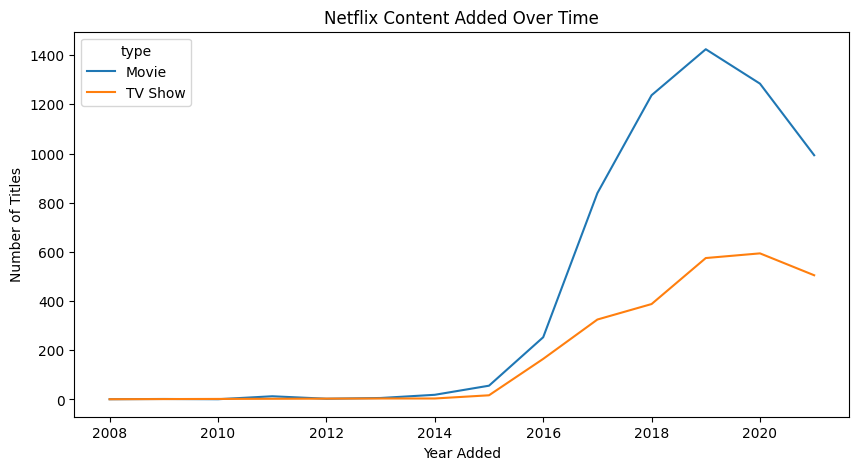

In [9]:
#TV Shows vs Movies over time.

content_by_type = df.groupby(['year_added', 'type']).size().reset_index(name='count')

plt.figure(figsize=(10,5))
sns.lineplot(data=content_by_type, x='year_added', y='count', hue='type')
plt.title('Netflix Content Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()


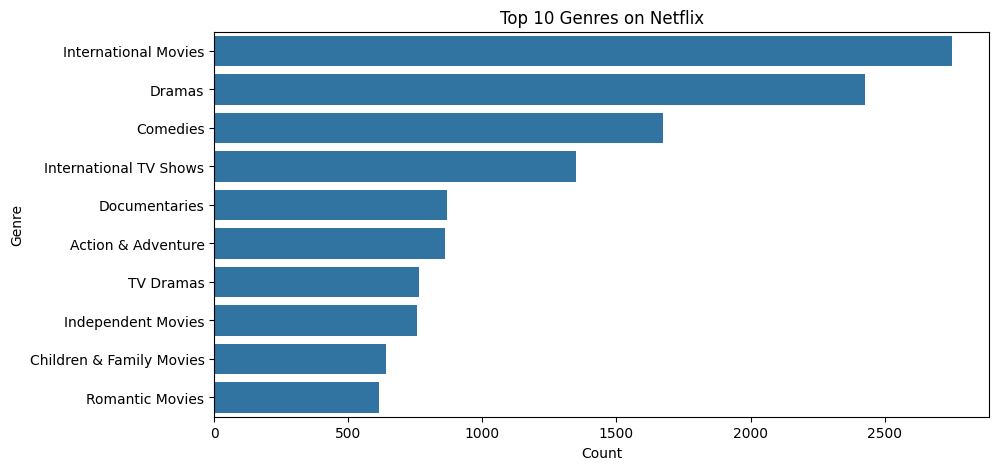

In [10]:
genre_series = df['listed_in'].str.split(', ').explode()
top_genres = genre_series.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


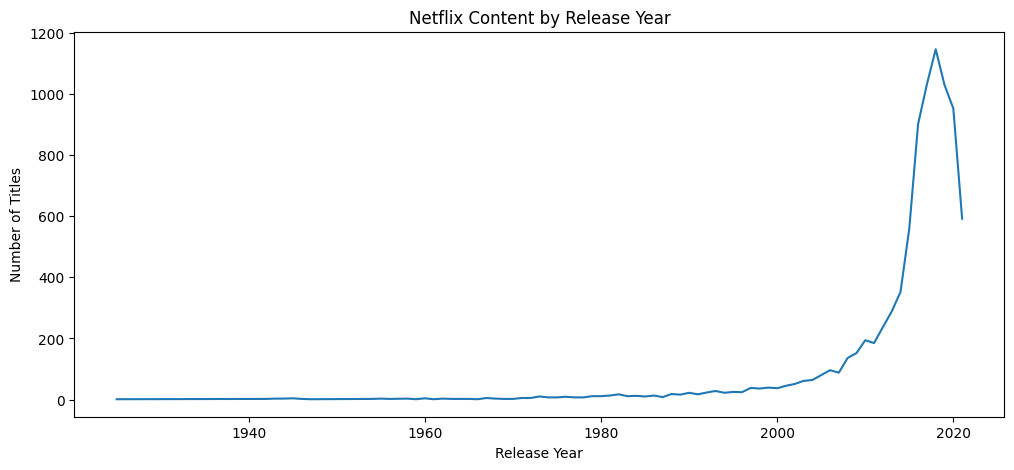

In [11]:
content_by_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.lineplot(x=content_by_year.index, y=content_by_year.values)
plt.title('Netflix Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


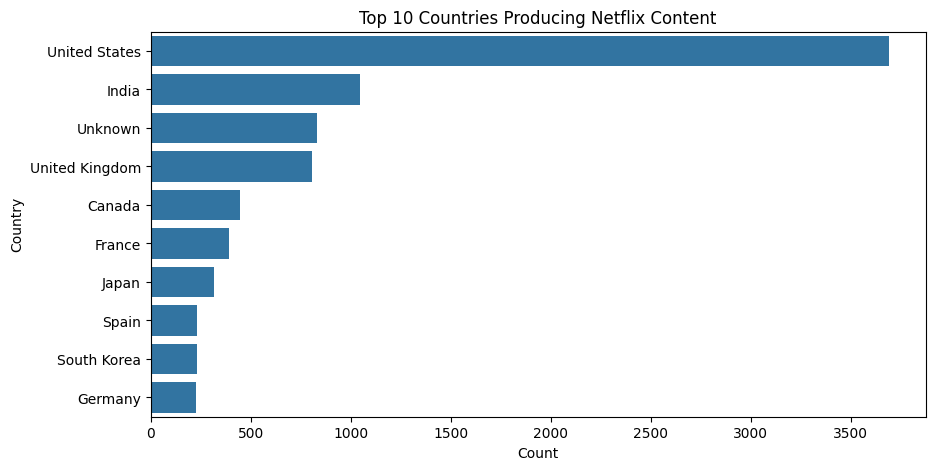

In [12]:

#Content production by country.
country_series = df['country'].str.split(', ').explode()
top_countries = country_series.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


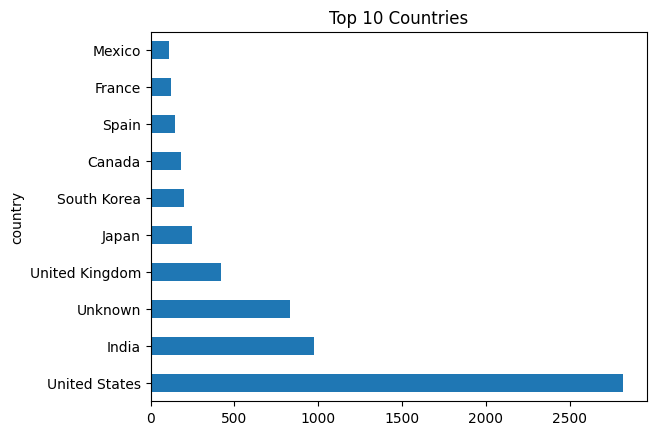

In [13]:
#top10 country
df['country'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Countries')
plt.show()


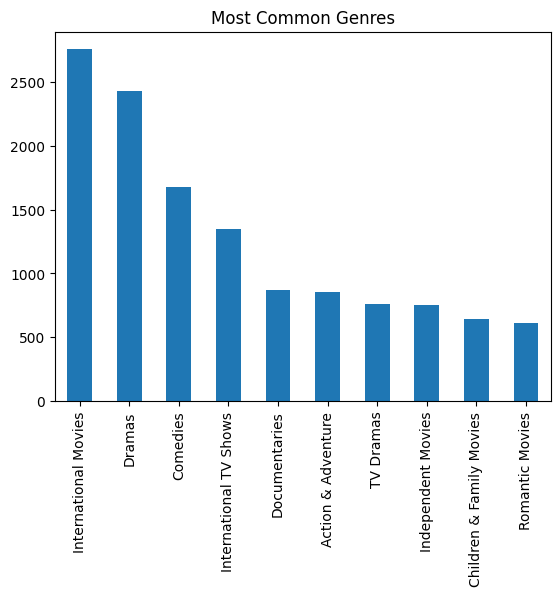

In [14]:
#top genre
df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='bar')
plt.title('Most Common Genres')
plt.show()


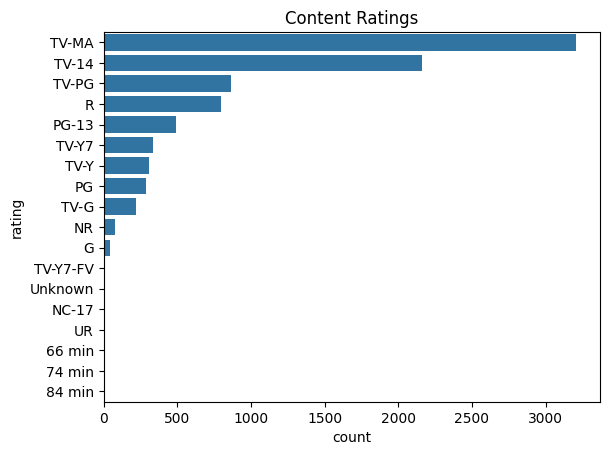

In [15]:
#rating destrubition
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title('Content Ratings')
plt.show()


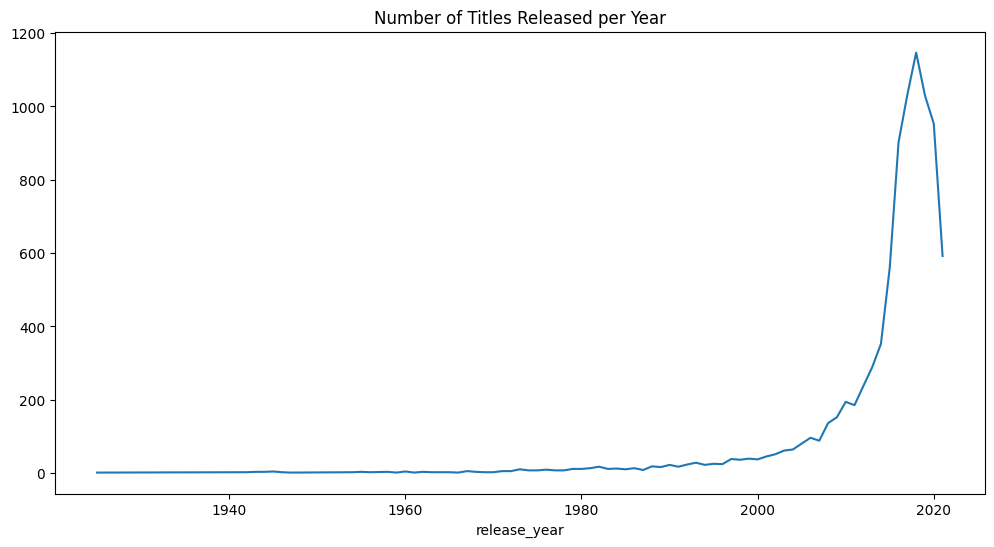

In [16]:
#count over the year
#Trends by year (release_year).
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,6))
plt.title('Number of Titles Released per Year')
plt.show()

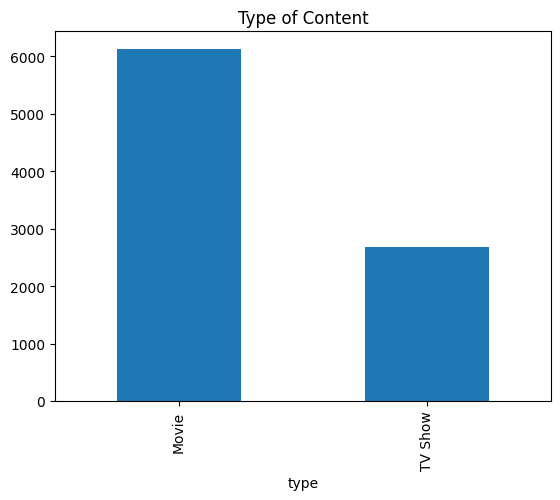

In [17]:
#count
df['type'].value_counts().plot(kind='bar', title='Type of Content')
plt.show()


#Top genres (listed_in column).




<Axes: xlabel='type', ylabel='year_added'>

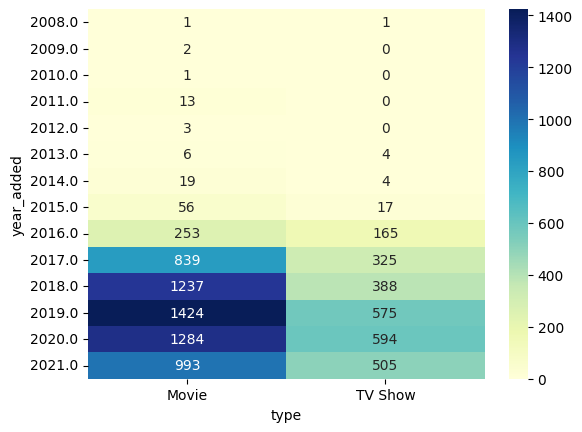

In [18]:
#heatmap
heatmap_data = df.pivot_table(index='year_added', columns='type', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')


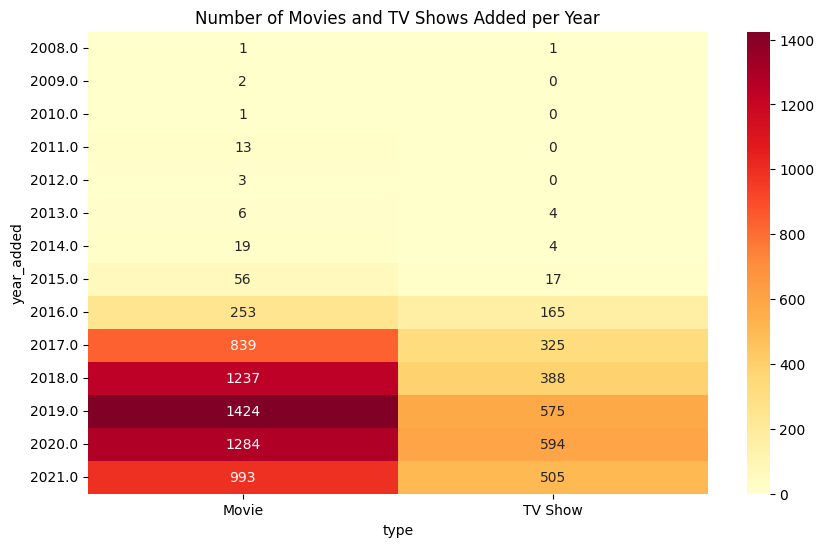

In [19]:
#"heatmap"
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Make sure 'date_added' is datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year
df['year_added'] = df['date_added'].dt.year

# Create pivot table
heatmap_data = df.pivot_table(index='year_added', columns='type', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd')
plt.title("Number of Movies and TV Shows Added per Year")
plt.show()

💡 What it means:
You’ll create a grid-like chart (called a heatmap) that shows how many Movies or TV Shows were added to Netflix in each year.

This helps you see trends over time, like:

Was Netflix adding more movies or shows in recent years?

In which year did they add the most content?

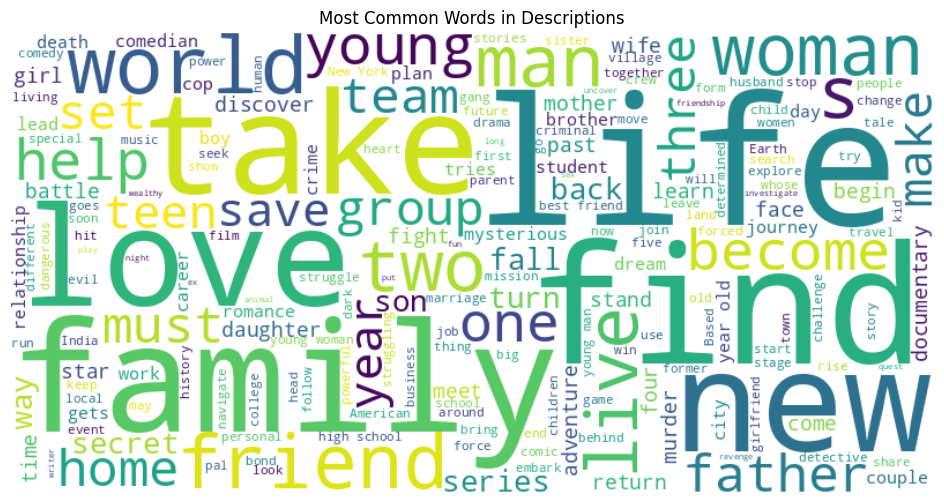

In [20]:
#WordCloud from titles or descriptions
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Descriptions')
plt.show()


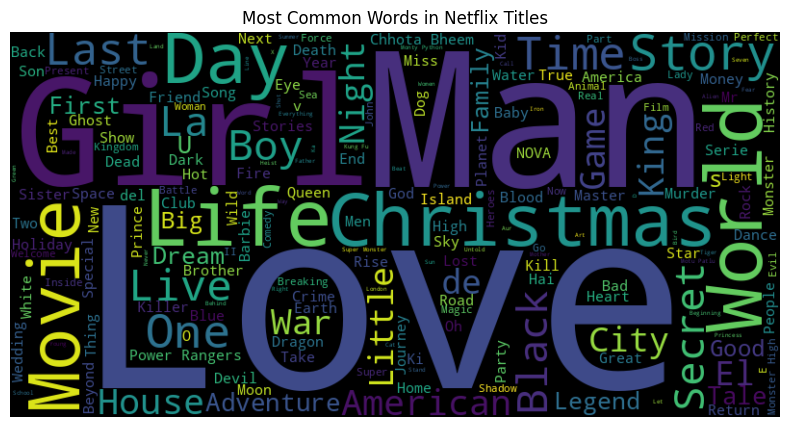

In [21]:
from wordcloud import WordCloud

# Combine all titles into one string
text = ' '.join(df['title'].dropna())

# Create and show the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Netflix Titles")
plt.show()


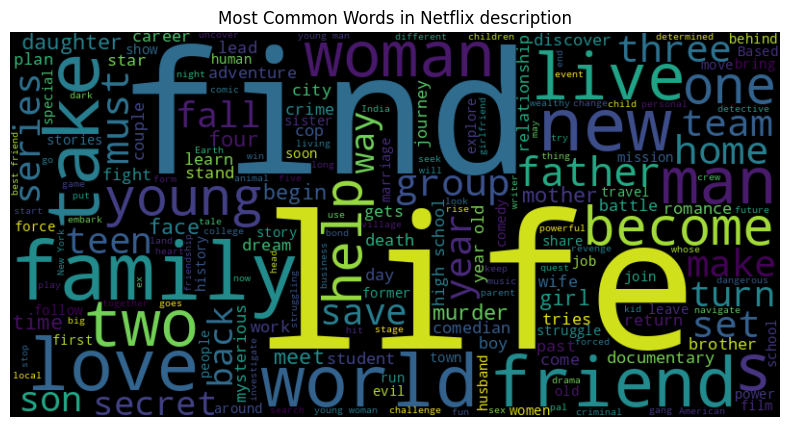

In [24]:

# Combine all description into one string
text = ' '.join(df['description'].dropna())

# Create and show the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Netflix description")
plt.show()


💡 What it means:
You’ll create a "cloud" of the most frequent words in either the titles or descriptions of the Netflix shows/movies.

Larger words in the cloud = more frequently used words.

This helps you see what themes or terms are common — e.g., maybe many shows contain the word "Love", "Murder", or "Adventure".